In [18]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

In [24]:
names = ["class","age","sex","steroid","antivirals","fatigue","malaise","anorexia","liver Big","liver firm","spleen palbable","spiders","ascites","varices","bilirubin","alk phoshate","sgot","albumin","protime","histologi"]
td= pd.read_csv('hepatitis.csv',names=names)
dataset.head(10)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver Big,liver firm,spleen palbable,spiders,ascites,varices,bilirubin,alk phoshate,sgot,albumin,protime,histologi
0,2,30,Female,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,Male,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,Male,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,Male,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,Male,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,Male,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,Male,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,Male,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,Male,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,Male,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [25]:
td.isnull().sum() # Checking for nulls

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver Big          0
liver firm         0
spleen palbable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phoshate       0
sgot               0
albumin            0
protime            0
histologi          0
dtype: int64

In [26]:
td["class"].replace((1,2),(0,1),inplace=True)
td["class"]=td["class"].astype("bool")
td.describe()

,age,sex,antivirals,histologi
count,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.103226,1.845161,1.451613
std,12.565878,0.305240,0.362923,0.499266
min,7.000000,1.000000,1.000000,1.000000
25%,32.000000,1.000000,2.000000,1.000000
50%,39.000000,1.000000,2.000000,1.000000
75%,50.000000,1.000000,2.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000


In [27]:
# Discretization of Age Column
td["age"]=np.where((td["age"]>10) & (td["age"]<20),"Teenagers",
                   np.where((td["age"]>=20) & (td["age"]<=30),"Adults",
                   np.where((td["age"]>30) & (td["age"]<=40),"Middle Aged",np.where((td["age"]<=10),"Children",
                            "Old"))))

In [28]:
td["age"]=pd.Categorical(td.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

In [29]:
td["age"].value_counts() 

Old            72
Middle Aged    50
Adults         32
Children        1
Teenagers       0
Name: age, dtype: int64

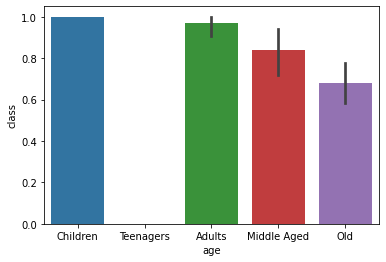

In [30]:
#draw a bar plot of Age vs. survival
sns.barplot(x="age", y="class", data=td)
plt.show()

In [31]:
td["sex"].replace((1,2),("Male","Female"),inplace=True)
td["sex"]=pd.Categorical(td.sex,["Male",'Female'],ordered=False)
td.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver Big,liver firm,spleen palbable,spiders,ascites,varices,bilirubin,alk phoshate,sgot,albumin,protime,histologi
0,True,Adults,Female,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,True,Old,Male,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,True,Old,Male,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,True,Middle Aged,Male,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,True,Middle Aged,Male,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [32]:
td.dropna(inplace=True) # Now dropping all nulls
td.dtypes

class                  bool
age                category
sex                category
steroid              object
antivirals            int64
fatigue              object
malaise              object
anorexia             object
liver Big            object
liver firm           object
spleen palbable      object
spiders              object
ascites              object
varices              object
bilirubin            object
alk phoshate         object
sgot                 object
albumin              object
protime              object
histologi             int64
dtype: object

In [33]:
#We have categorical variables .getdummies seperates the different categories of categorical variables as separate 
#binary columns
td1 = pd.get_dummies(td,drop_first=True)
#List of new columns
print(td1.columns)
td1.head(5)

Index(['class', 'antivirals', 'histologi', 'age_Teenagers', 'age_Adults',
       'age_Middle Aged', 'age_Old', 'sex_Female', 'steroid_2', 'steroid_?',
       ...
       'protime_74', 'protime_75', 'protime_76', 'protime_77', 'protime_78',
       'protime_80', 'protime_84', 'protime_85', 'protime_90', 'protime_?'],
      dtype='object', length=302)


,class,antivirals,histologi,age_Teenagers,age_Adults,age_Middle Aged,age_Old,sex_Female,steroid_2,steroid_?,...,protime_74,protime_75,protime_76,protime_77,protime_78,protime_80,protime_84,protime_85,protime_90,protime_?
0,True,2,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,True,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,True,2,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,True,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,True,2,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
y=td1["class"].copy()
X=td1.drop(columns=["class"])
print(y.shape)
print(X.shape)

(155,)
(155, 301)


In [41]:
#Random Forest method for feature selection
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
X_features=X.columns
model.fit(X, y)
# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
imp_features= model.feature_importances_
feature_array=np.array(X_features)
sorted_features=pd.DataFrame(list(zip(feature_array,imp_features))).sort_values(by=1,ascending=False)
#print(sorted_features)
data_top=sorted_features[:X.shape[1]]
feature_to_rem=sorted_features[X.shape[1]:]
print("Unimportant Columms after simple Random Forrest\n",feature_to_rem)
rem_index=list(feature_to_rem.index)
print(rem_index)
print("Important Columms after simple Random Forrest\n",data_top)
data_top_index=list(data_top.index)
print("Important Columms after simple Random Forrest\n",data_top_index )
print(importances)
#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
#cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250]
#print(cols_randfor_removed)
X_randfor_sel = X.drop(X.columns[rem_index],axis=1)
#X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)

Unimportant Columms after simple Random Forrest
 Empty DataFrame
Columns: [0, 1]
Index: []
[]
Important Columms after simple Random Forrest
                    0         1
23         ascites_2  0.060400
21         spiders_2  0.033449
25         varices_2  0.029142
1          histologi  0.028215
11         malaise_2  0.026039
..               ...       ...
151         sgot_128  0.000000
145         sgot_110  0.000000
273       protime_47  0.000000
142  alk phoshate_96  0.000000
224          sgot_90  0.000000

[301 rows x 2 columns]
Important Columms after simple Random Forrest
 [23, 21, 25, 1, 11, 9, 5, 19, 230, 262, 16, 232, 143, 227, 17, 13, 207, 300, 7, 241, 236, 123, 18, 229, 48, 33, 43, 268, 264, 3, 15, 89, 185, 137, 139, 233, 256, 99, 6, 217, 59, 163, 144, 270, 228, 202, 122, 179, 169, 146, 226, 49, 87, 261, 243, 55, 286, 269, 35, 102, 27, 260, 134, 88, 121, 42, 74, 149, 271, 161, 40, 235, 60, 299, 45, 63, 56, 4, 32, 245, 22, 238, 37, 68, 171, 24, 210, 239, 71, 135, 0, 20, 28, 83,

In [42]:
#creat train-test split parts for manual split

trainX, testX, trainy, testy= skm.train_test_split(X,y, test_size=0.25, random_state=99) #explain random state
print("\n shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n shape of train split: ")
print(testX.shape, testy.shape)


 shape of train split: 
(116, 301) (116,)

 shape of train split: 
(39, 301) (39,)


In [43]:
### Making X Scalar for ML algorithms
X = skp.StandardScaler().fit(X).transform(X)

In [44]:
knn = KNeighborsClassifier()
knn.fit(trainX,trainy)
predictions = knn.predict(testX)
accknn=accuracy_score(testy, predictions)*100
print("Accuracy of KNN (%): \n", accknn)  
#get FPR
fprknn, tprknn, _ = roc_curve(testy, predictions)
aucknn=auc(fprknn, tprknn)*100
print("AUC OF KNN (%): \n", aucknn)
recallknn=recall_score(testy,predictions)*100
print("Recall of KNN is: \n",recallknn)
precknn=precision_score(testy,predictions)*100
print("Precision of KNN is: \n",precknn)

Accuracy of KNN (%): 
 71.7948717948718
AUC OF KNN (%): 
 56.481481481481474
Recall of KNN is: 
 96.29629629629629
Precision of KNN is: 
 72.22222222222221
